In [ ]:
!pip install folium

In [ ]:
!pip install pymannkendall

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df1 = pd.read_csv("good_data_v6.xls")
df2 = pd.read_csv("good_data_v6_pre1.xls")
df3 = pd.read_csv("good_data_v6_pre2.xls")
df4 = pd.read_csv("good_data_v6_pre3.xls")
df5 = pd.read_csv("good_data_v6_aug.xls")
df6 = pd.read_csv("good_data_v6_post.xls")

In [ ]:
l = [df1,df2,df3,df4,df5,df6]
df = pd.concat(l,ignore_index=True)

In [ ]:
df.sample(15)

STATE_UT     DISTRICT      BLOCK    VILLAGE  LATITUDE  \
723799             Pune     Ambegaon     Ausari      Khurd  18.97611   
1400240  Madhya_Pradesh    Burhanpur  Burhanpur  Ichchapur  21.15167   
522183          Haryana         Jind     Ujhana      Korar  29.72917   
135168      Maharashtra        Jalna      Jalna   Badnapur  19.86972   
137185           Odisha   Mayurbhanj   Joshipur    Mananda  21.98667   
919201            Kabir        Nagar   Mehdawal   Maidawal  26.96667   
596116        Telangana     Siddipet   Cheriyal    Cherial  17.92444   
317038      West_Bengal   Jalpaiguri    Rajganj      Gadra  26.55445   
323685      Maharashtra    Ratnagiri       Khed        Oni  17.70000   
848782        Rajasthan      Karauli    Karauli  Bhauapura  26.54190   
358778           Punjab        Mansa     Jhunir    Junniar  29.80833   
594428          Medchal   Malkajgiri      Uppal      Uppal  17.40234   
467996        Rajasthan    Dungarpur    Jothari   Karawara  23.63300   
103685      Maharashtra     Parbhani     Pathri      Walur  19.48972   
599459    Uttar_Pradesh  Bulandshahr      Dibai   Jargawan  28.13833   

         LONGITUDE      Date  WL(mbgl)  
723799    73.85750  10-05-22     10.90  
1400240   76.16167  01-11-06      8.10  
522183    76.04167  20-05-08     10.71  
135168    75.71333  08-01-16      9.90  
137185    86.01833  10-01-16      4.60  
919201    83.11667  31-08-16      5.10  
596116    79.97083  01-05-11     11.48  
317038    88.45277  01-01-00      4.40  
323685    73.58333  09-01-99      8.50  
848782    77.18220  30-08-21      0.80  
358778    75.35417  01-01-96      2.10  
594428    78.56109  01-05-05     11.95  
467996    73.75000  01-05-96      7.10  
103685    76.55139  10-01-18     20.20  
599459    78.42500  31-05-13      7.20

In [ ]:
df.shape

(1538924, 8)

In [ ]:
df = df.drop(columns=["STATE_UT","DISTRICT","BLOCK","VILLAGE"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538924 entries, 0 to 1538923
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   LATITUDE   1538924 non-null  float64
 1   LONGITUDE  1538924 non-null  float64
 2   Date       1538924 non-null  object 
 3   WL(mbgl)   1538924 non-null  float64
dtypes: float64(3), object(1)
memory usage: 47.0+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y', errors='coerce')
df['Year_Quarter'] = df['Date'].dt.to_period('Q')

df_long = df[['LATITUDE', 'LONGITUDE', 'Year_Quarter', 'WL(mbgl)']].copy()
display(df_long.sample(15))

LATITUDE  LONGITUDE Year_Quarter  WL(mbgl)
163171   24.83833   75.14000       2014Q1     10.20
476249   17.39583   81.08333       2003Q2      5.50
1158179  26.47305   89.79833       1994Q3      2.20
431081   26.59889   78.50167       2000Q2      6.80
974630   24.41944   82.03750       2011Q3      3.40
758431   26.69580   75.68330       2020Q2     23.58
660002   29.77500   74.51667       2016Q2     12.00
1174640  25.71139   84.02278       2023Q4      3.10
264340   16.30920   81.21200       2004Q1      2.50
1280767   9.86978   76.30480       2016Q4      1.20
269991   19.75417   77.01389       2004Q1      9.70
1137176  14.91667   77.08333       1995Q3      5.40
911704   22.54861   74.31944       2016Q3      1.60
1441198  20.85000   73.34167       2002Q4      6.30
954825   20.53333   74.56667       2013Q3      3.80

In [ ]:
df_long.shape

(1538924, 4)

In [ ]:
df.isnull().sum()

LATITUDE        0
LONGITUDE       0
Date            0
WL(mbgl)        0
Year_Quarter    0
dtype: int64

In [ ]:
df.isna().sum()

LATITUDE        0
LONGITUDE       0
Date            0
WL(mbgl)        0
Year_Quarter    0
dtype: int64

### Basic Stats

In [ ]:
print("Overall Water Level Statistics:")
print(df['WL(mbgl)'].describe())

# Statistics by location
location_stats = df.groupby(['LATITUDE', 'LONGITUDE']).agg({
    'WL(mbgl)': ['count', 'mean', 'std', 'min', 'max', 'median']
}).round(2)
print("\nStatistics by Location:")
print(location_stats)

Overall Water Level Statistics:
count    1.538924e+06
mean     7.902042e+00
std      4.986040e+01
min      0.000000e+00
25%      2.800000e+00
50%      5.200000e+00
75%      9.030000e+00
max      5.394360e+04
Name: WL(mbgl), dtype: float64

Statistics by Location:
                   WL(mbgl)                                  
                      count   mean    std   min    max median
LATITUDE LONGITUDE                                           
8.08333  77.55000        94  11.35   6.47  0.60  21.90  12.35
8.08889  77.55000        17  11.84   5.25  5.00  22.40  11.80
8.10278  77.54390        45   8.27   6.20  0.90  24.22   6.00
8.10417  77.54330        24  26.21  12.86  4.60  49.30  27.25
8.12500  77.52500         5   1.94   1.78  0.10   4.70   1.60
...                     ...    ...    ...   ...    ...    ...
34.54444 74.32639         7   3.80   1.58  2.29   6.50   3.58
         74.38472         8   3.01   1.58  2.10   6.80   2.48
34.55652 74.18637         2   2.80   0.71  2.30   3.30

In [ ]:
df

LATITUDE  LONGITUDE       Date  WL(mbgl) Year_Quarter
0        17.46330    82.0271 2024-01-01       9.0       2024Q1
1        17.50320    82.0124 2024-01-01       4.0       2024Q1
2        17.57208    82.0085 2024-01-01       1.9       2024Q1
3        17.43790    82.0740 2024-01-01       1.4       2024Q1
4        18.23880    83.0011 2024-01-01       5.3       2024Q1
...           ...        ...        ...       ...          ...
1538919  25.84000    87.9400 1994-11-01       3.0       1994Q4
1538920  25.89000    87.8500 1994-11-01       4.6       1994Q4
1538921  25.76140    87.9583 1994-11-01       2.8       1994Q4
1538922  25.70000    88.1300 1994-11-01       2.1       1994Q4
1538923  25.75000    88.1700 1994-11-01       3.2       1994Q4

[1538924 rows x 5 columns]

In [ ]:
date_stats = df.groupby(['LATITUDE', 'LONGITUDE'])['Date'].agg(['min', 'max', 'count'])

print("\nMonitoring Period by Location:")
date_stats.sample(15)


Monitoring Period by Location:


min        max  count
LATITUDE LONGITUDE                             
27.86194 81.76917  1994-01-01 2024-05-10    104
16.20427 81.11465  2023-05-01 2024-05-10      2
24.58300 72.78300  1994-01-01 2012-11-10     66
23.77500 75.10833  1999-08-20 2024-05-10     96
14.94489 78.31180  1994-01-01 2024-05-10    115
22.77389 88.49750  2019-04-20 2023-04-20      2
17.31830 76.83250  1994-01-25 2000-01-05     25
15.10830 76.05000  2000-05-27 2024-05-10     20
19.56306 73.10361  2023-01-10 2024-01-10      5
26.30361 84.69111  2016-05-30 2024-05-10     10
19.06099 77.91577  2012-05-01 2024-05-10      9
32.38108 75.46773  2002-11-30 2024-01-01     19
9.62493  76.36710  2015-04-01 2024-04-10     31
29.76750 76.97306  2015-05-20 2023-11-01     16
24.05000 83.10000  1994-01-01 2024-05-10    115

###Time Series

- AVG trend

Average trend plot created as 'average_water_level_trend.png'


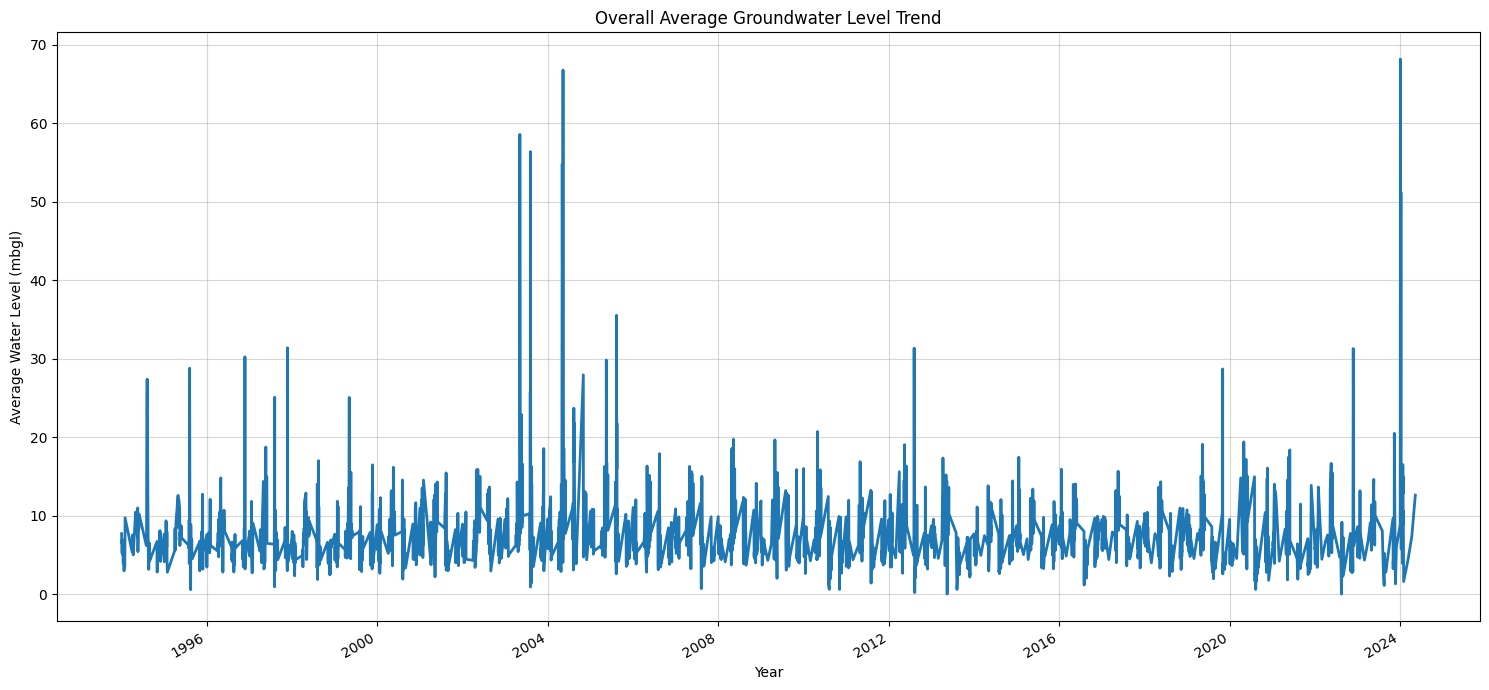

In [ ]:
average_wl = df.groupby('Date')['WL(mbgl)'].mean().sort_index()
plt.figure(figsize=(15, 7))
average_wl.plot(linewidth=2)

plt.xlabel('Year')
plt.ylabel('Average Water Level (mbgl)')
plt.title('Overall Average Groundwater Level Trend')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig('average_water_level_trend.png')

print("Average trend plot created as 'average_water_level_trend.png'")

- Plot for 5 Locations with the Most Data

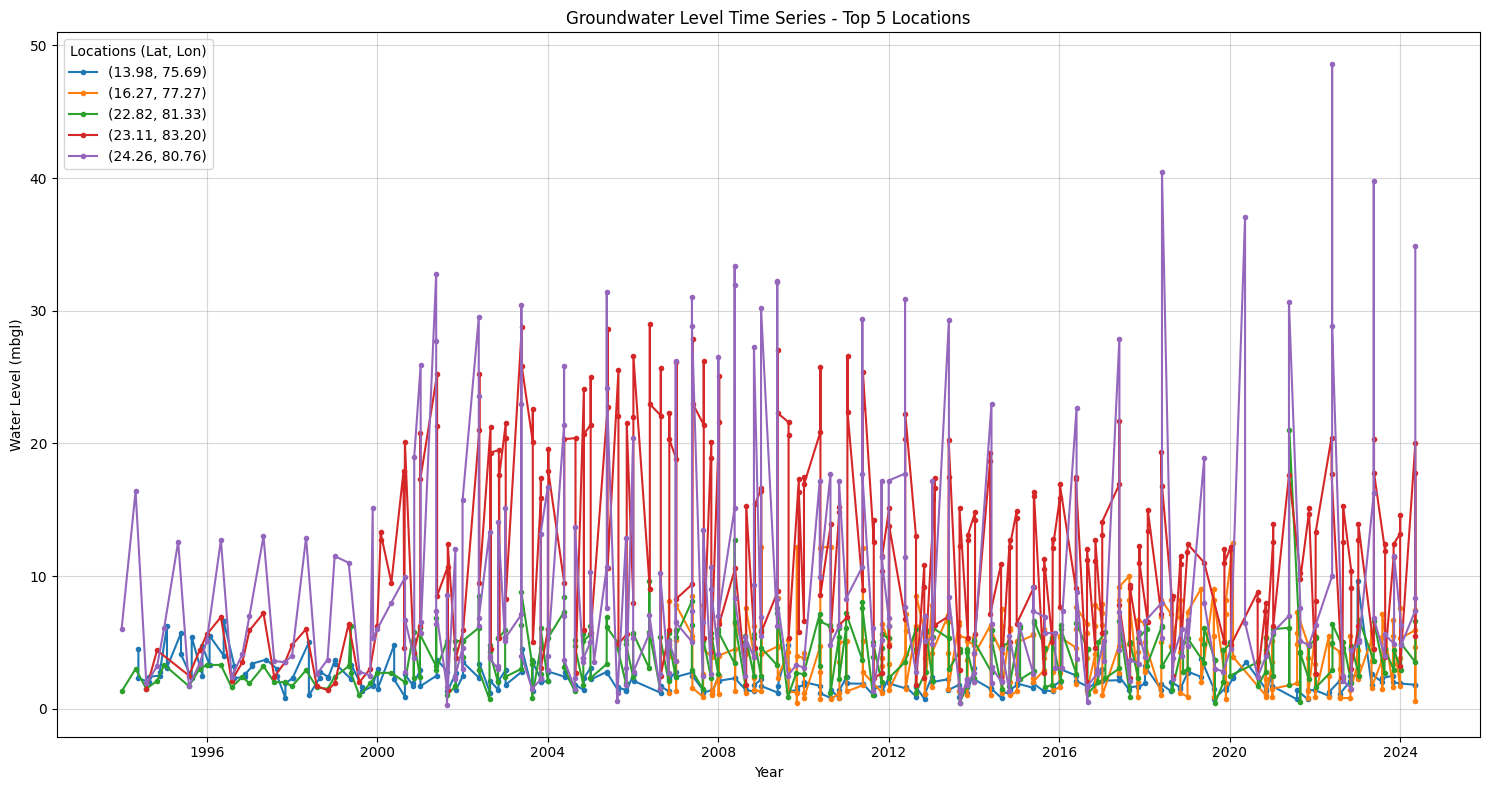

In [ ]:
location_counts = df.groupby(['LATITUDE', 'LONGITUDE']).size()


top_5_locations = location_counts.nlargest(5).index

df_top5 = df[df.set_index(['LATITUDE', 'LONGITUDE']).index.isin(top_5_locations)]

plt.figure(figsize=(15, 8))
for (lat, lon), group in df_top5.groupby(['LATITUDE', 'LONGITUDE']):

    group_sorted = group.sort_values('Date')
    plt.plot(group_sorted['Date'], group_sorted['WL(mbgl)'],
             marker='o', markersize=3, linewidth=1.5,
             label=f'({lat:.2f}, {lon:.2f})')

plt.xlabel('Year')
plt.ylabel('Water Level (mbgl)')
plt.title('Groundwater Level Time Series - Top 5 Locations')
plt.legend(title="Locations (Lat, Lon)")
plt.grid(True, alpha=0.5)
plt.tight_layout()

- AVG Readings

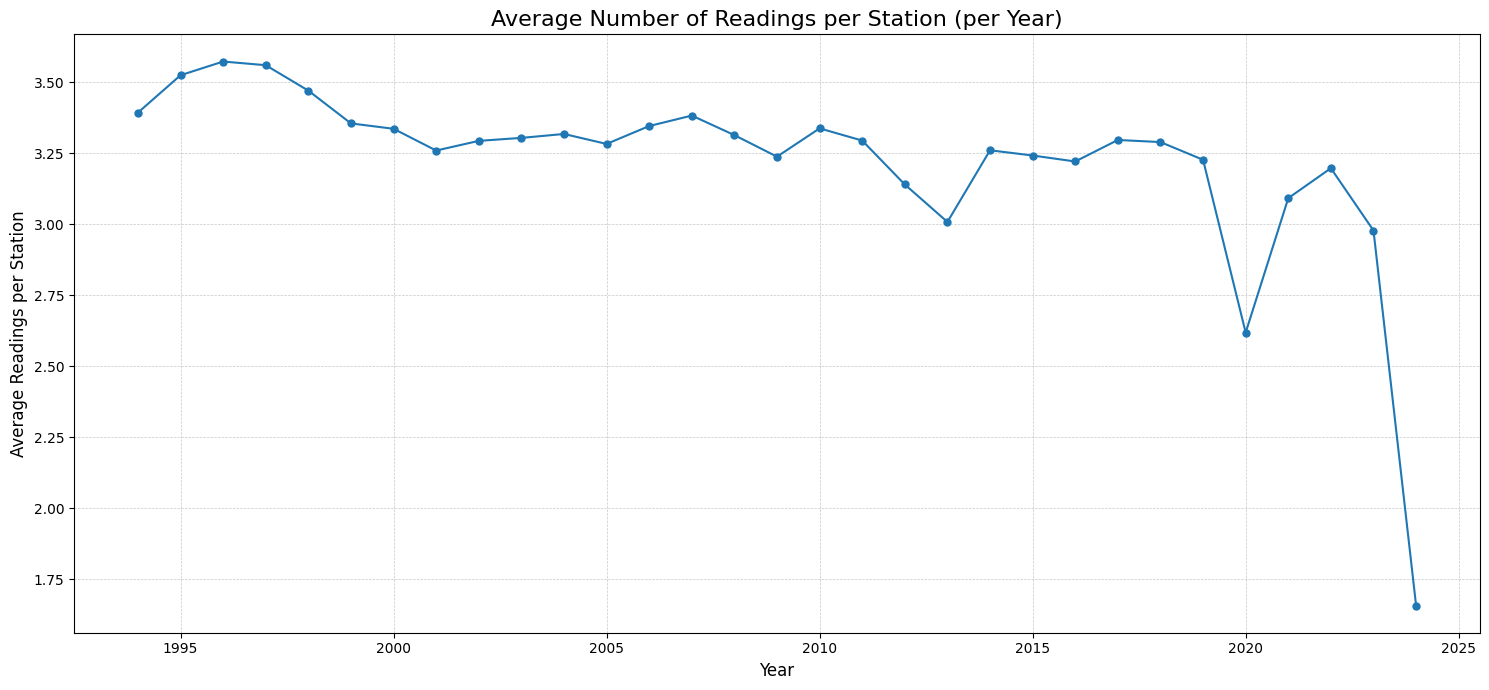

In [ ]:
df['Year'] = df['Date'].dt.year

readings_per_loc_year = df.groupby(['LATITUDE', 'LONGITUDE', 'Year']).size()

avg_per_year = readings_per_loc_year.groupby('Year').mean()

avg_per_year = avg_per_year.rename('AvgReadingsPerStation')

plt.figure(figsize=(15, 7))

avg_per_year.sort_index().plot(marker='o', linestyle='-', markersize=5)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Readings per Station', fontsize=12)
plt.title('Average Number of Readings per Station (per Year)', fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

### Individual Location Analysis

--- Step 1: Preparing Locations ---
Found 38932 unique locations to cluster.
--- Step 2: Clustering All Locations ---
Clustering complete.
--- Step 3: Calculating Cluster Trends ---
--- Step 4: Plotting Cluster Trends ---

Plot saved as 'all_locations_cluster_trends.png'


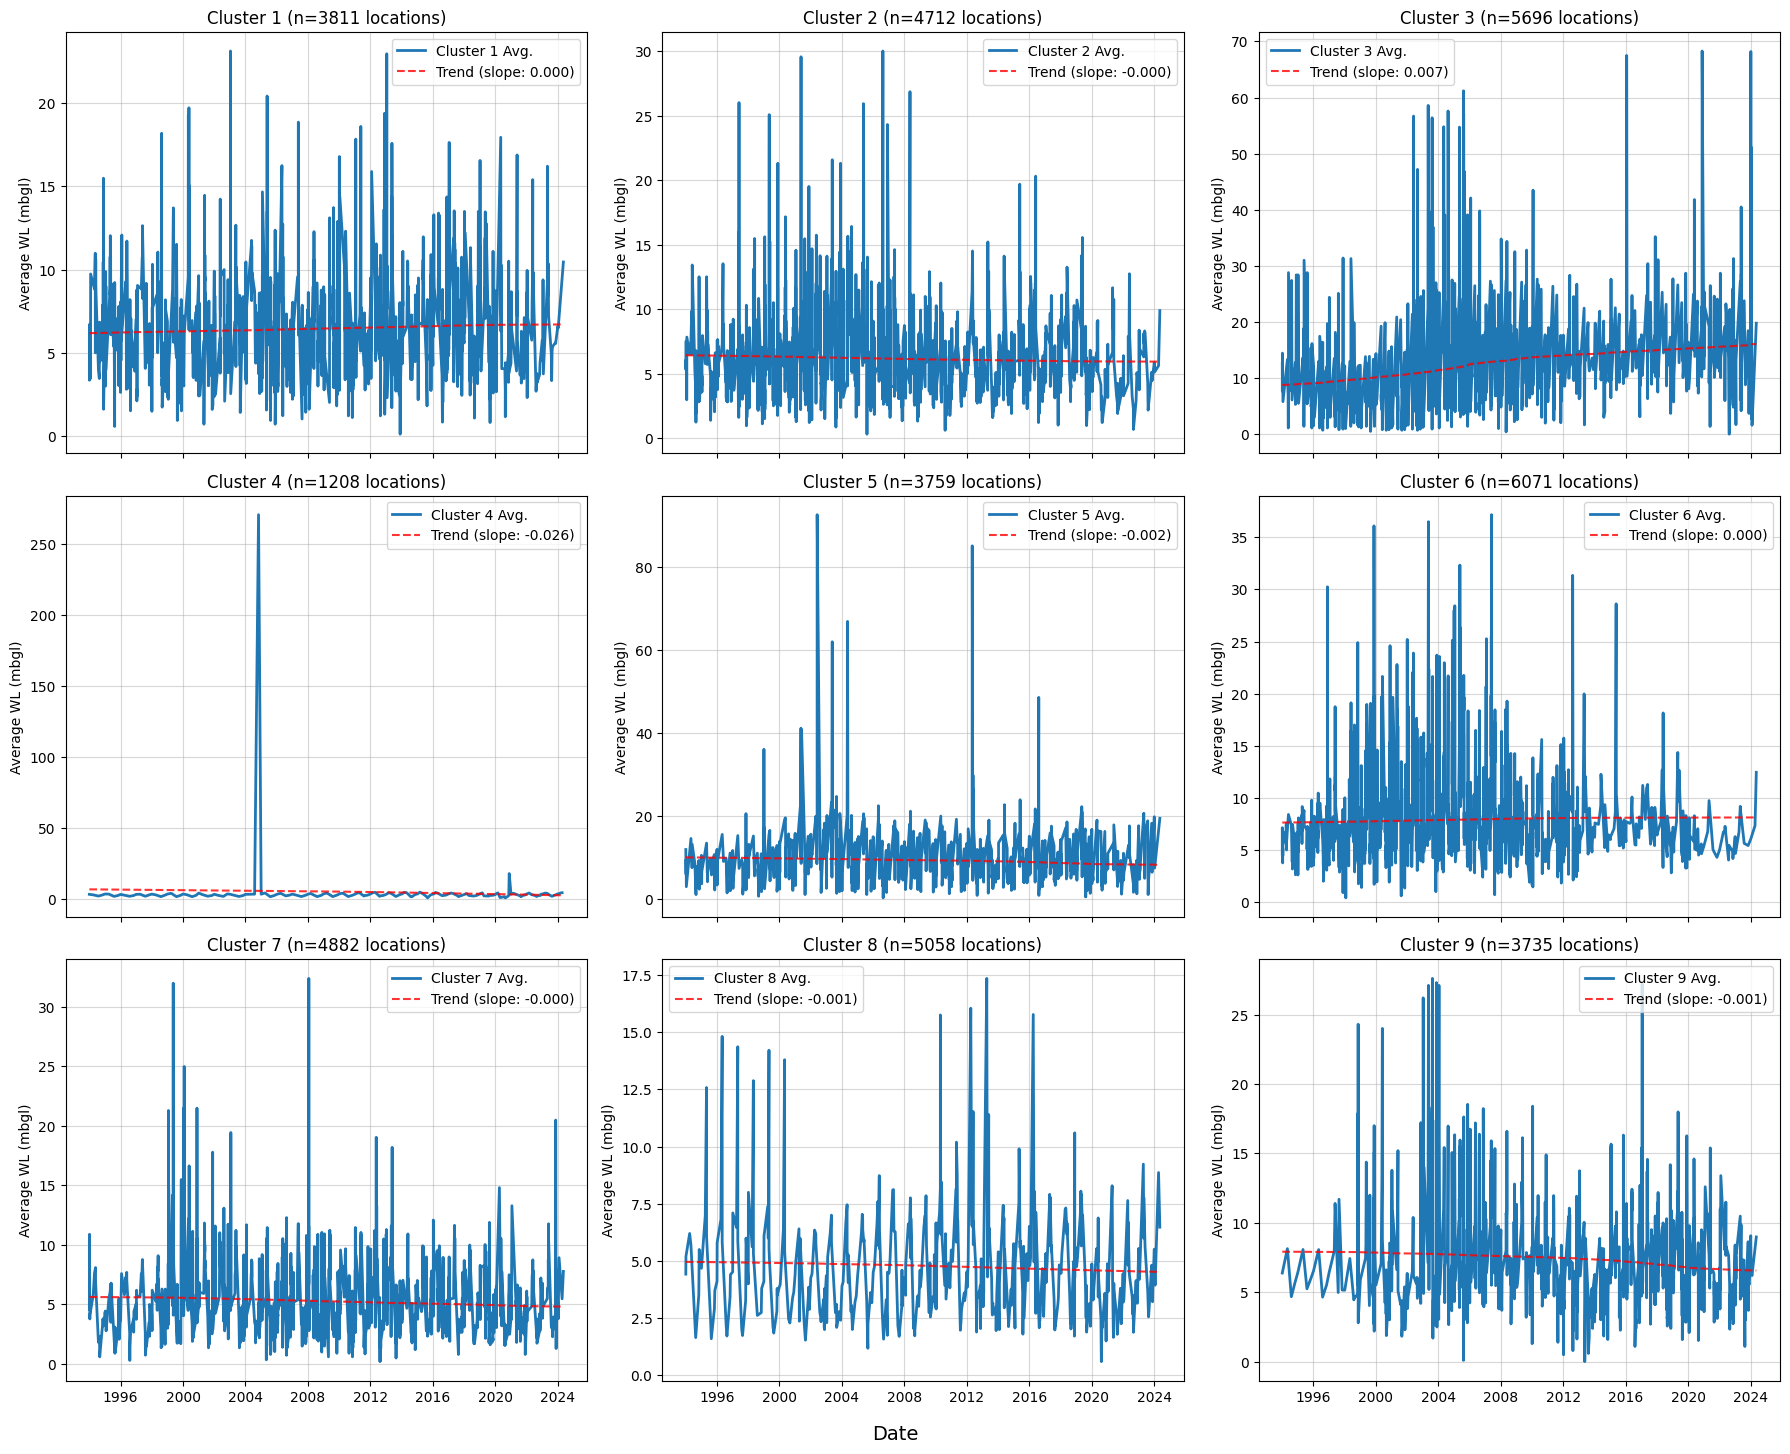

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_clean = df
# --- End Setup ---

print("--- Step 1: Preparing Locations ---")
# 1. Get ALL unique locations (no sampling)
locations = df_clean[['LATITUDE', 'LONGITUDE']].drop_duplicates()
n_locations = len(locations)
print(f"Found {n_locations} unique locations to cluster.")

print("--- Step 2: Clustering All Locations ---")
# 2. Scale all locations for K-Means
scaler = StandardScaler()
locations_scaled = scaler.fit_transform(locations[['LATITUDE', 'LONGITUDE']])

# 3. Use standard KMeans to create 9 clusters
# n_init=10 is the modern default to ensure a good result
kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)

# This step will be very fast
locations['cluster'] = kmeans.fit_predict(locations_scaled)
print("Clustering complete.")

# 4. Merge the cluster labels back into the main DataFrame
df_with_clusters = df_clean.merge(locations, on=['LATITUDE', 'LONGITUDE'])

print("--- Step 3: Calculating Cluster Trends ---")
# 5. Calculate the average trend for each cluster
# We group by cluster and Date, then find the average WL(mbgl)
cluster_trends = df_with_clusters.groupby(['cluster', 'Date'])['WL(mbgl)'].mean().reset_index()

print("--- Step 4: Plotting Cluster Trends ---")
# 6. Plot the 9 cluster trends in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15), sharex=True)
axes = axes.flatten() # Make the 2D grid of axes easy to loop over

for i in range(9):
    ax = axes[i]
    cluster_data = cluster_trends[cluster_trends['cluster'] == i].sort_values('Date')

    if cluster_data.empty:
        ax.set_title(f"Cluster {i+1} (No Data)")
        continue

    # Plot the main time series
    ax.plot(cluster_data['Date'], cluster_data['WL(mbgl)'],
            linewidth=2, label=f'Cluster {i+1} Avg.')

    # Get the number of unique locations in this cluster
    n_in_cluster = locations[locations['cluster'] == i].shape[0]

    ax.set_title(f'Cluster {i+1} (n={n_in_cluster} locations)')
    ax.set_ylabel('Average WL (mbgl)')
    ax.grid(True, alpha=0.5)

    # Add a trend line for the cluster average
    # We must drop NaNs for polyfit to work
    trend_data = cluster_data.dropna(subset=['WL(mbgl)'])

    if len(trend_data) > 1:
        # Create a numeric index [0, 1, 2...] for polyfit
        x_numeric = np.arange(len(trend_data))

        z = np.polyfit(x_numeric, trend_data['WL(mbgl)'], 1)
        p = np.poly1d(z)

        # Plot the trend line on the original dates
        ax.plot(trend_data['Date'], p(x_numeric),
                "r--", alpha=0.8, label=f'Trend (slope: {z[0]:.3f})')
        ax.legend()

# Add a shared x-axis label
fig.text(0.5, 0.04, 'Date', ha='center', va='center', fontsize=14)
plt.tight_layout(rect=[0, 0.05, 1, 1]) # Adjust layout to make room for x-label
plt.savefig('all_locations_cluster_trends.png')

print("\nPlot saved as 'all_locations_cluster_trends.png'")

### Trend Analysis

In [ ]:
import pymannkendall as mk

trend_results = []
# Sample a subset of locations for faster execution
# Adjust the sample size as needed
sampled_locations = df.groupby(['LATITUDE', 'LONGITUDE']).size().sample(n=1000, random_state=42).index


for (lat, lon) in sampled_locations:
    group = df[(df['LATITUDE'] == lat) & (df['LONGITUDE'] == lon)].sort_values('Date')



    # 1. Extract the data and explicitly drop NaNs
    data = group['WL(mbgl)'].dropna().values

    # 2. Check length *after* dropping NaNs
    if len(data) < 4:  # Your minimum 4 points for trend analysis
        continue  # Skip this group, not enough valid data

    # 3. Check for constant values (zero variance)
    #    np.all(data == data[0]) checks if all elements are equal to the first one
    if np.all(data == data[0]):
        # Data is constant. Trend is 0, but stats are undefined.
        # We'll manually set them to non-significant.
        sen_slope = 0.0
        z_score = 0.0
        p_value = 1.0  # p_value of 1.0 indicates no significance
        is_significant = False

    else:
        # 4. If data is valid (no NaNs, not constant), run the test
        result = mk.original_test(data, alpha=0.05)

        sen_slope = result.slope
        z_score = result.z
        p_value = result.p
        is_significant = result.h


    # Now, append the results, whether calculated or manually set
    trend_results.append({
        'LATITUDE': lat,
        'LONGITUDE': lon,
        'n_observations': len(data),  # Use len(data) to reflect valid obs
        'sen_slope': sen_slope,
        'sen_slope_annual': sen_slope * 4,
        'z_score': z_score,
        'p_value': p_value,
        'trend_significant': is_significant,
        'first_year': group['Year'].min(),
        'last_year': group['Year'].max()
    })

trend_df = pd.DataFrame(trend_results)
print("Trend Analysis Results:")
print(trend_df.round(4))

Trend Analysis Results:
     LATITUDE  LONGITUDE  n_observations  sen_slope  sen_slope_annual  \
0     22.9783    75.5217              42     0.0000            0.0000   
1      8.9847    76.8367              21    -0.0388           -0.1550   
2     12.6451    75.1088              39    -0.0112           -0.0448   
3     31.6792    75.2417              59     0.2200            0.8800   
4     22.6649    71.9684               7     0.1333            0.5333   
..        ...        ...             ...        ...               ...   
812   23.1597    86.3480              28    -0.0275           -0.1101   
813   20.0750    72.9250             118     0.0121            0.0485   
814   23.5606    75.5067              10    -0.0500           -0.2000   
815   21.0208    73.1458             111    -0.0012           -0.0049   
816   20.9272    83.7950             115     0.0031            0.0124   

     z_score  p_value  trend_significant  first_year  last_year  
0     0.0542   0.9568            

- trends visualisation


In [ ]:
import folium
from branca.element import Template, MacroElement # Used for the custom legend

# 1. Create a base map
#    Center it on the average lat/lon of *all* your data
if not trend_df.empty:
    map_center = [trend_df['LATITUDE'].mean(), trend_df['LONGITUDE'].mean()]
else:
    map_center = [20.5937, 78.9629] # Default to center of India

m = folium.Map(location=map_center, zoom_start=5, tiles="CartoDB positron")

# 2. Add a marker for each location from the *full* trend_df
for idx, row in trend_df.iterrows():

    # --- Apply your desired color logic ---
    color = ''
    if row['trend_significant']:
        if row['sen_slope_annual'] > 0.1:     # Increasing (Improving)
            color = 'green'
        elif row['sen_slope_annual'] < -0.1:  # Decreasing (Worsening)
            color = 'red'
        else:                                 # Stable
            color = 'blue'
    else:                                     # Not significant
        color = 'gray'
    # --------------------------------------

    # Create the detailed popup text (shows on click)
    popup_text = f"""
    <b>Location:</b> ({row['LATITUDE']:.4f}, {row['LONGITUDE']:.4f})<br>
    <b>Annual Trend:</b> {row['sen_slope_annual']:.4f} m/year<br>
    <b>p-value:</b> {row['p_value']:.4f}<br>
    <b>Z-score:</b> {row['z_score']:.4f}<br>
    <b>Years:</b> {row['first_year']} - {row['last_year']}<br>
    <b>Significant:</b> {row['trend_significant']}
    """

    # Create the simple tooltip text (shows on hover)
    # This replicates your plt.annotate()
    tooltip_text = f"Trend: {row['sen_slope_annual']:.2f} m/yr"

    # Add the marker to the map
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300), # Detailed info on click
        tooltip=tooltip_text                           # Simple info on hover
    ).add_to(m)

# 3. Add a custom legend (like your plt.title)
#    This uses Branca, which is installed with Folium
legend_template = """
{% macro html(this, kwargs) %}
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 220px; height: 120px;
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white; opacity: 0.9;
    ">
    &nbsp; <b>Groundwater Trend Legend</b> <br>
    &nbsp; <i class="fa fa-circle" style="color:green"></i>&nbsp; Improving (Sig. & > 0.1) <br>
    &nbsp; <i class="fa fa-circle" style="color:red"></i>&nbsp; Worsening (Sig. & < -0.1) <br>
    &nbsp; <i class="fa fa-circle" style="color:blue"></i>&nbsp; Stable (Sig. & -0.1 to 0.1) <br>
    &nbsp; <i class="fa fa-circle" style="color:gray"></i>&nbsp; Not Significant
</div>
{% endmacro %}
"""

macro = MacroElement()
macro._template = Template(legend_template)
m.add_child(macro)


m

### Seasonal Analysis

Rows after dropping invalid dates: 1538924
Calculated seasonal means for 123529 location-season pairs.
Found 26130 locations with complete data for all 4 seasons.
Using quantiles: vmin=1.00, vmax=23.60


/tmp/ipython-input-2600528883.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout for suptitle


Generated seasonal water level maps with quantile scale as 'seasonal_water_level_maps_quantile_scale.png'


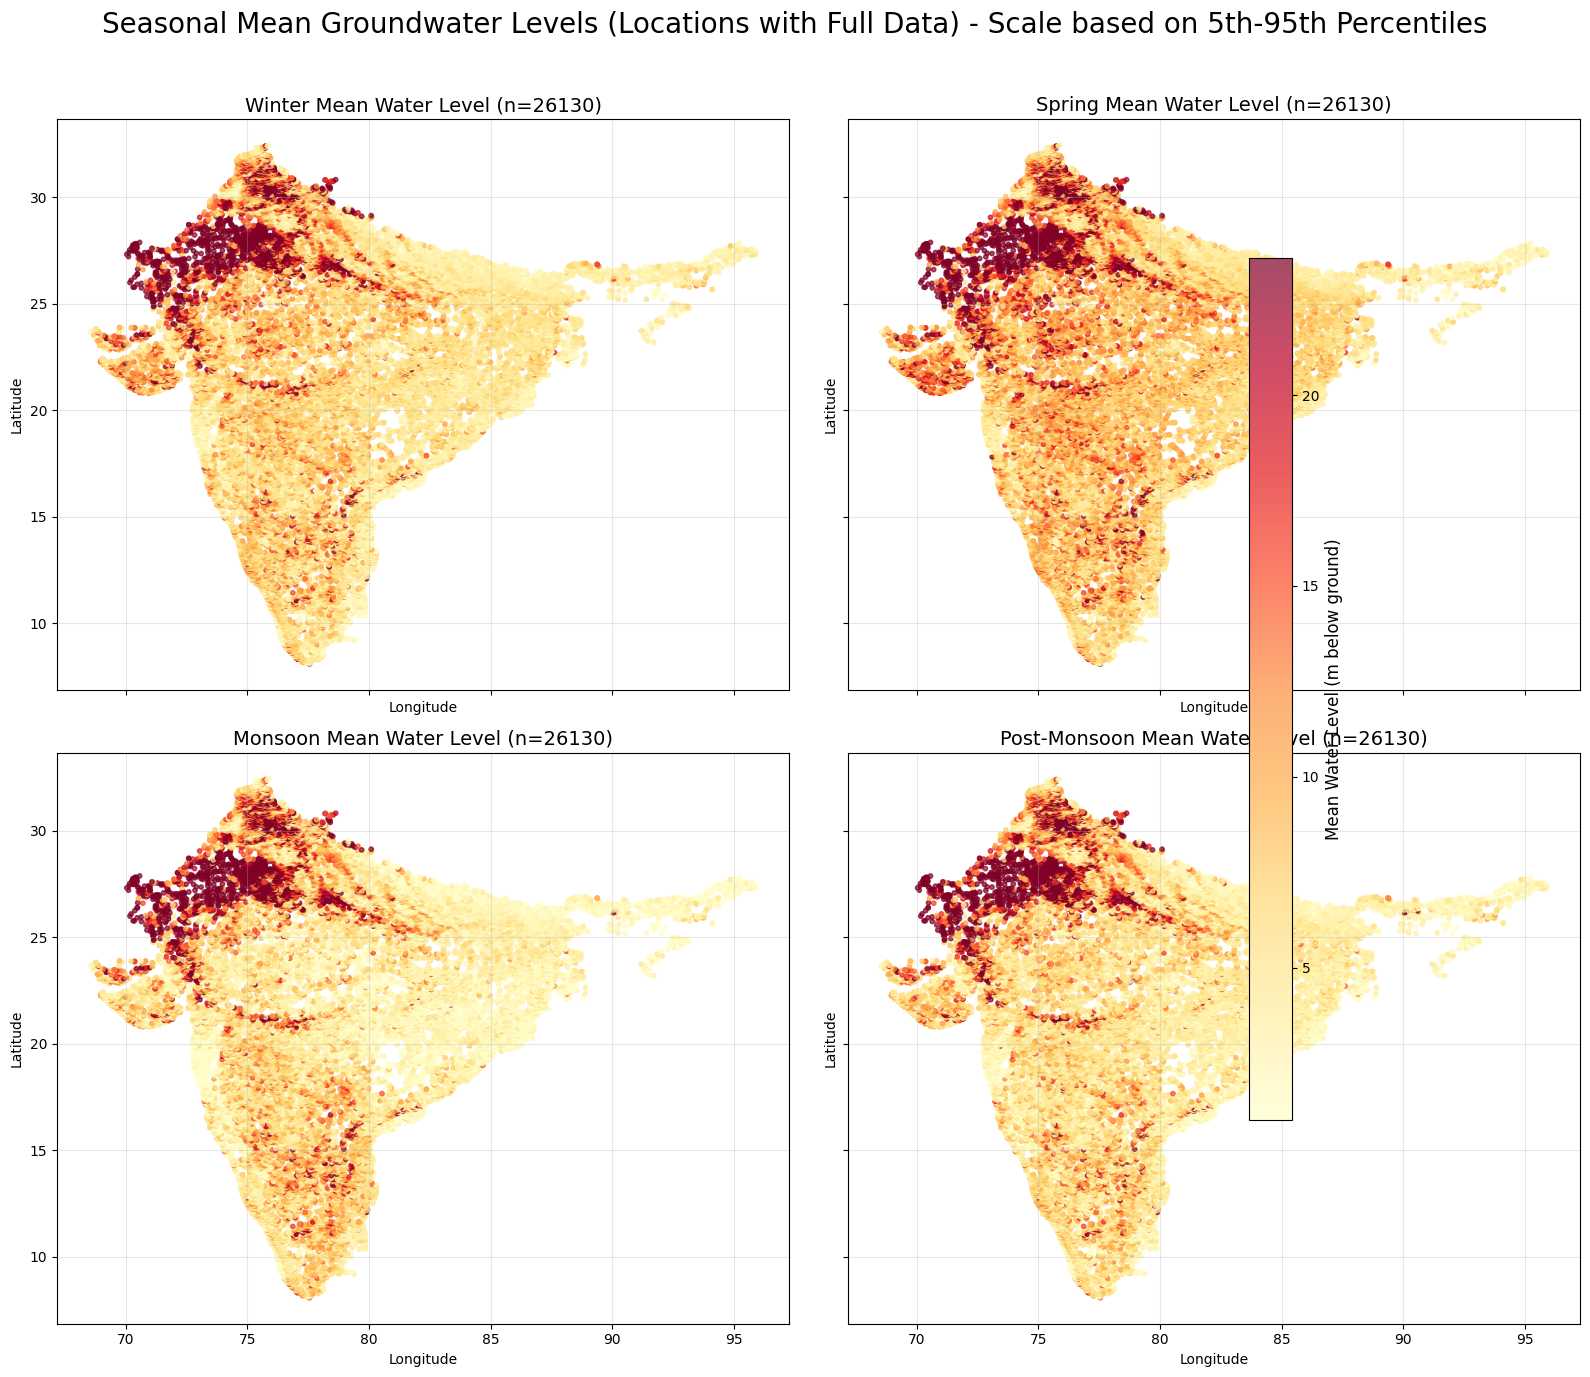

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y', errors='coerce')

# Drop any rows that failed date conversion
df = df.dropna(subset=['Date'])
print(f"Rows after dropping invalid dates: {len(df)}")

# Create 'Season' column based on calendar quarters
df['Season'] = df['Date'].dt.quarter.map({
    1: 'Winter',
    2: 'Spring',
    3: 'Monsoon',
    4: 'Post-Monsoon'
})

# Drop any rows where season couldn't be mapped (shouldn't happen, but good practice)
df = df.dropna(subset=['Season'])

# --- Data Aggregation ---
# Calculate the mean water level for each location and season
seasonal_stats = df.groupby(['LATITUDE', 'LONGITUDE', 'Season'])['WL(mbgl)'].mean().reset_index()
print(f"Calculated seasonal means for {len(seasonal_stats)} location-season pairs.")

# Find locations that have data for ALL four seasons
location_season_counts = seasonal_stats.groupby(['LATITUDE', 'LONGITUDE'])['Season'].count()
locations_with_all_seasons = location_season_counts[location_season_counts == 4].index

seasonal_stats_complete = seasonal_stats[
    seasonal_stats.set_index(['LATITUDE', 'LONGITUDE']).index.isin(locations_with_all_seasons)
]

print(f"Found {len(locations_with_all_seasons)} locations with complete data for all 4 seasons.")

# --- Plotting ---
if seasonal_stats_complete.empty:
    print("No locations found with data for all four seasons. Cannot generate maps.")
else:
    # Get the global min/max for a consistent color scale using quantiles
    # Use the 5th and 95th percentiles of the entire dataset (df_clean)
    vmin = df_clean['WL(mbgl)'].quantile(0.05)
    vmax = df_clean['WL(mbgl)'].quantile(0.95)
    print(f"Using quantiles: vmin={vmin:.2f}, vmax={vmax:.2f}")

    cmap_name = 'YlOrRd'  # Yellow (low mbgl) to Red (high mbgl)

    seasons_order = ['Winter', 'Spring', 'Monsoon', 'Post-Monsoon']

    # Create the 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(16, 14), sharex=True, sharey=True)
    axes = axes.flatten()

    scatter = None # To hold the scatter plot object for the colorbar

    for i, season in enumerate(seasons_order):
        ax = axes[i]
        season_data = seasonal_stats_complete[seasonal_stats_complete['Season'] == season]

        if not season_data.empty:
            scatter = ax.scatter(
                season_data['LONGITUDE'],
                season_data['LATITUDE'],
                c=season_data['WL(mbgl)'],
                cmap=cmap_name,
                s=10,  # Marker size
                alpha=0.7,
                vmin=vmin,
                vmax=vmax
            )

        ax.set_title(f'{season} Mean Water Level (n={len(season_data)})', fontsize=14)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.grid(True, alpha=0.3)

    # Add a single, shared colorbar
    if scatter:
        cbar = fig.colorbar(scatter, ax=axes.ravel().tolist(), shrink=0.8, pad=0.02)
        cbar.set_label('Mean Water Level (m below ground)', fontsize=12)

    plt.suptitle('Seasonal Mean Groundwater Levels (Locations with Full Data) - Scale based on 5th-95th Percentiles', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout for suptitle
    plt.savefig('seasonal_water_level_maps_quantile_scale.png')
    print("Generated seasonal water level maps with quantile scale as 'seasonal_water_level_maps_quantile_scale.png'")

## Calculate seasonal differences

For each location with complete seasonal data, calculate the difference in mean water level between key seasonal pairs (e.g., Monsoon vs. Spring, Post-Monsoon vs. Spring, Winter vs. Monsoon).


In [ ]:
# Pivot the seasonal_stats_complete DataFrame
seasonal_pivot = seasonal_stats_complete.pivot_table(
    index=['LATITUDE', 'LONGITUDE'],
    columns='Season',
    values='WL(mbgl)'
).reset_index()

# Calculate seasonal differences
seasonal_pivot['Monsoon_Spring_Diff'] = seasonal_pivot['Monsoon'] - seasonal_pivot['Spring']
seasonal_pivot['PostMonsoon_Spring_Diff'] = seasonal_pivot['Post-Monsoon'] - seasonal_pivot['Spring']
seasonal_pivot['Winter_Monsoon_Diff'] = seasonal_pivot['Winter'] - seasonal_pivot['Monsoon']

display(seasonal_pivot.head())

Season  LATITUDE  LONGITUDE    Monsoon  Post-Monsoon     Spring     Winter  \
0        8.08333    77.5500  12.808000       10.8400  11.657692   9.873913   
1        8.10278    77.5439  10.258333        6.1800  11.121818   5.400000   
2        8.10417    77.5433  26.280000       24.4000  28.716667  25.311111   
3        8.12500    77.5250   0.800000        0.1000   2.500000   3.150000   
4        8.13194    77.3667   3.700000        2.3875   3.243333   2.620000   

Season  Monsoon_Spring_Diff  PostMonsoon_Spring_Diff  Winter_Monsoon_Diff  
0                  1.150308                -0.817692            -2.934087  
1                 -0.863485                -4.941818            -4.858333  
2                 -2.436667                -4.316667            -0.968889  
3                 -1.700000                -2.400000             2.350000  
4                  0.456667                -0.855833            -1.080000

In [ ]:
seasonal_diff_df = seasonal_pivot[['LATITUDE', 'LONGITUDE', 'Monsoon_Spring_Diff', 'PostMonsoon_Spring_Diff', 'Winter_Monsoon_Diff']].copy()

display(seasonal_diff_df.head())

Season  LATITUDE  LONGITUDE  Monsoon_Spring_Diff  PostMonsoon_Spring_Diff  \
0        8.08333    77.5500             1.150308                -0.817692   
1        8.10278    77.5439            -0.863485                -4.941818   
2        8.10417    77.5433            -2.436667                -4.316667   
3        8.12500    77.5250            -1.700000                -2.400000   
4        8.13194    77.3667             0.456667                -0.855833   

Season  Winter_Monsoon_Diff  
0                 -2.934087  
1                 -4.858333  
2                 -0.968889  
3                  2.350000  
4                 -1.080000

## Visualize seasonal differences


Generating Monsoon vs Spring Difference Map...


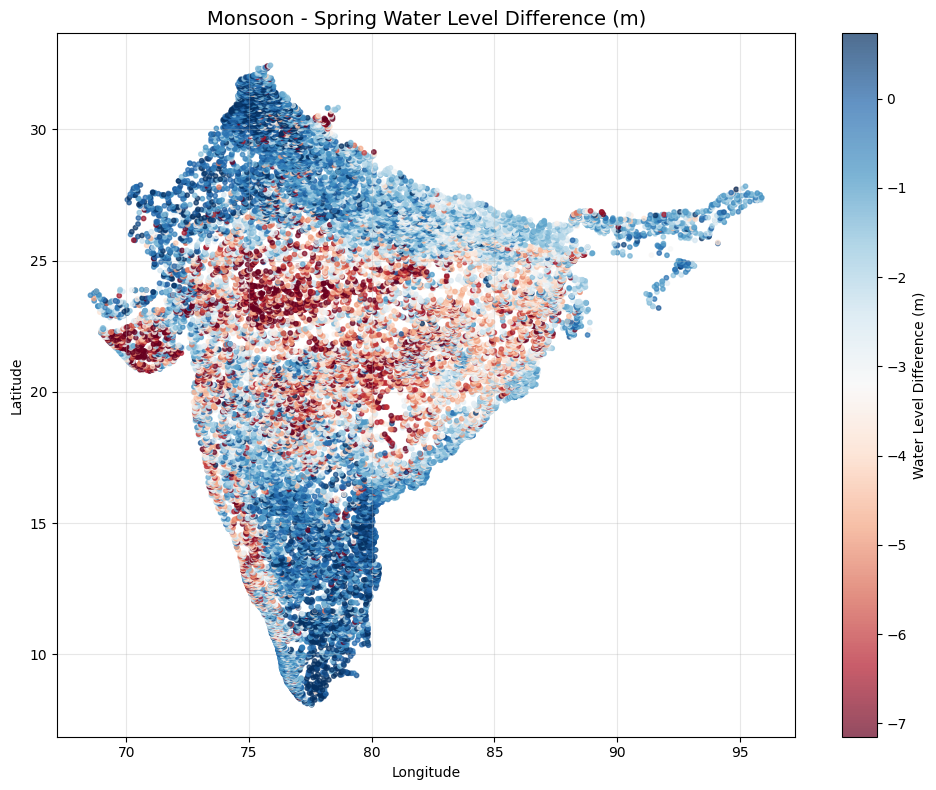


Generating Post-Monsoon vs Spring Difference Map...


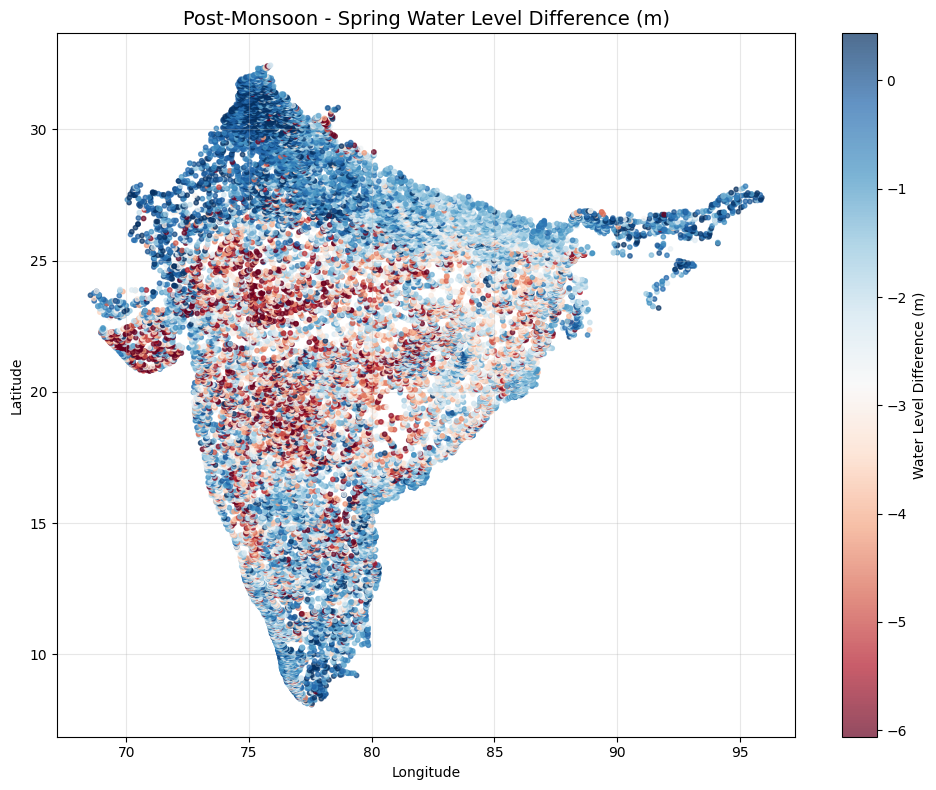


Generating Winter vs Monsoon Difference Map...


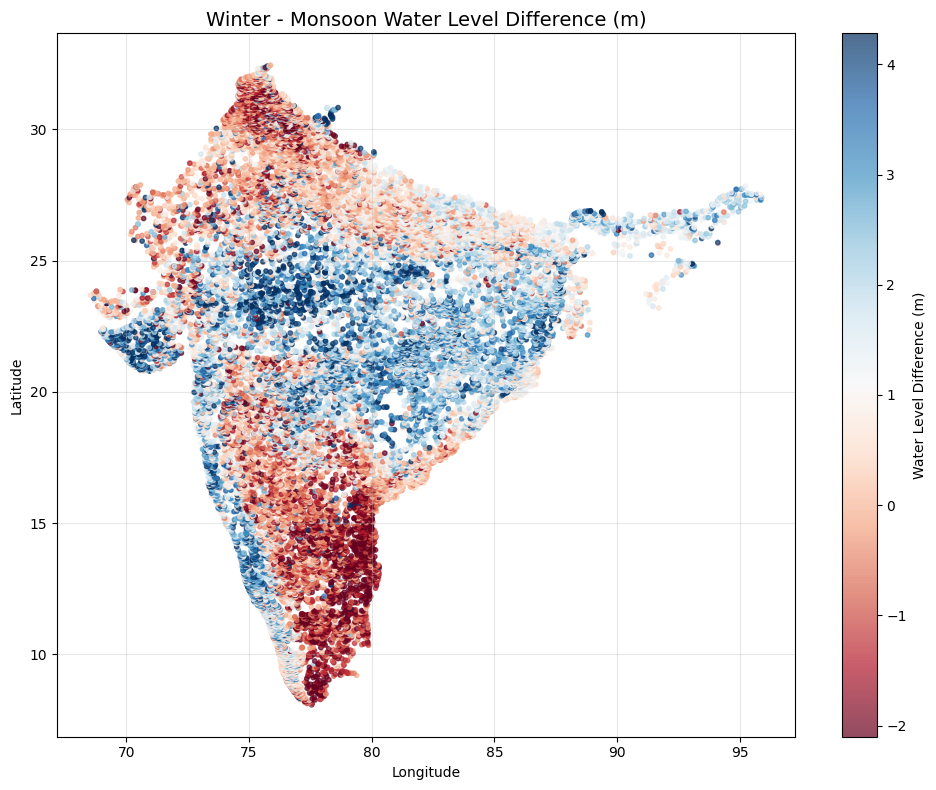

In [ ]:
import folium
import branca.colormap as cm
import matplotlib.pyplot as plt # Import matplotlib

def create_seasonal_diff_map(df, diff_col, map_title, colormap_name='RdBu'):
    """
    Generates a static map using Matplotlib visualizing seasonal water level differences.

    Args:
        df (pd.DataFrame): DataFrame with LATITUDE, LONGITUDE, and difference columns.
        diff_col (str): The name of the column containing the seasonal difference values.
        map_title (str): The title for the map and color bar.
        colormap_name (str): The name of the Matplotlib colormap to use.
    """
    # 1. Create a figure and axes
    plt.figure(figsize=(10, 8))
    ax = plt.gca() # Get current axes

    # 2. Determine min and max for color scale (using quantiles for robustness)
    vmin = df[diff_col].quantile(0.05)
    vmax = df[diff_col].quantile(0.95)

    # 3. Create a colormap
    cmap = plt.get_cmap(colormap_name)


    # 4. Add a scatter plot for each location
    scatter = ax.scatter(
        df['LONGITUDE'],
        df['LATITUDE'],
        c=df[diff_col],
        cmap=cmap,
        s=10,  # Marker size
        alpha=0.7,
        vmin=vmin,
        vmax=vmax
    )

    # 5. Add titles and labels
    ax.set_title(map_title, fontsize=14)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True, alpha=0.3)

    # 6. Add a color bar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Water Level Difference (m)')

    # 7. Tight layout and save the figure
    plt.tight_layout()
    plt.savefig(f'{diff_col}_map.png')
    plt.show()


# 8. Call the function for each seasonal difference to generate static maps
print("Generating Monsoon vs Spring Difference Map...")
create_seasonal_diff_map(
    seasonal_diff_df,
    'Monsoon_Spring_Diff',
    'Monsoon - Spring Water Level Difference (m)',
    colormap_name='RdBu' # Red for decrease (worsening), Blue for increase (improving)
)

print("\nGenerating Post-Monsoon vs Spring Difference Map...")
create_seasonal_diff_map(
    seasonal_diff_df,
    'PostMonsoon_Spring_Diff',
    'Post-Monsoon - Spring Water Level Difference (m)',
    colormap_name='RdBu'
)

print("\nGenerating Winter vs Monsoon Difference Map...")
create_seasonal_diff_map(
    seasonal_diff_df,
    'Winter_Monsoon_Diff',
    'Winter - Monsoon Water Level Difference (m)',
    colormap_name='RdBu'
)

LATITUDE  LONGITUDE       Date  WL(mbgl) Year_Quarter  Year  \
0        17.46330    82.0271 2024-01-01       9.0       2024Q1  2024   
1        17.50320    82.0124 2024-01-01       4.0       2024Q1  2024   
2        17.57208    82.0085 2024-01-01       1.9       2024Q1  2024   
3        17.43790    82.0740 2024-01-01       1.4       2024Q1  2024   
4        18.23880    83.0011 2024-01-01       5.3       2024Q1  2024   
...           ...        ...        ...       ...          ...   ...   
1538919  25.84000    87.9400 1994-11-01       3.0       1994Q4  1994   
1538920  25.89000    87.8500 1994-11-01       4.6       1994Q4  1994   
1538921  25.76140    87.9583 1994-11-01       2.8       1994Q4  1994   
1538922  25.70000    88.1300 1994-11-01       2.1       1994Q4  1994   
1538923  25.75000    88.1700 1994-11-01       3.2       1994Q4  1994   

               Season  
0              Winter  
1              Winter  
2              Winter  
3              Winter  
4              Winter  
...               ...  
1538919  Post-Monsoon  
1538920  Post-Monsoon  
1538921  Post-Monsoon  
1538922  Post-Monsoon  
1538923  Post-Monsoon  

[1538924 rows x 7 columns]